# With quantstats

We support and recommend [quantstats](https://github.com/ranaroussi/quantstats)

In [1]:
import pandas as pd

from cvx.simulator.builder import builder

# Get rid of findfont: Font family 'Arial' not found.
# when running a remote notebook on Jupyter Server on Ubuntu Linux server
import logging
logging.getLogger("matplotlib.font_manager").setLevel(logging.ERROR)

In [2]:
prices = pd.read_csv("data/stock_prices.csv", header=0, index_col=0, parse_dates=True) 

In [3]:
capital = 1e6

In [4]:
b = builder(prices=prices, initial_cash=capital)

In [5]:
for t, state in b:
    # each day we invest a quarter of the capital in the assets
    b[t[-1]] = (1.0 / len(b.assets)) * state.nav / state.prices

In [6]:
portfolio= b.build()

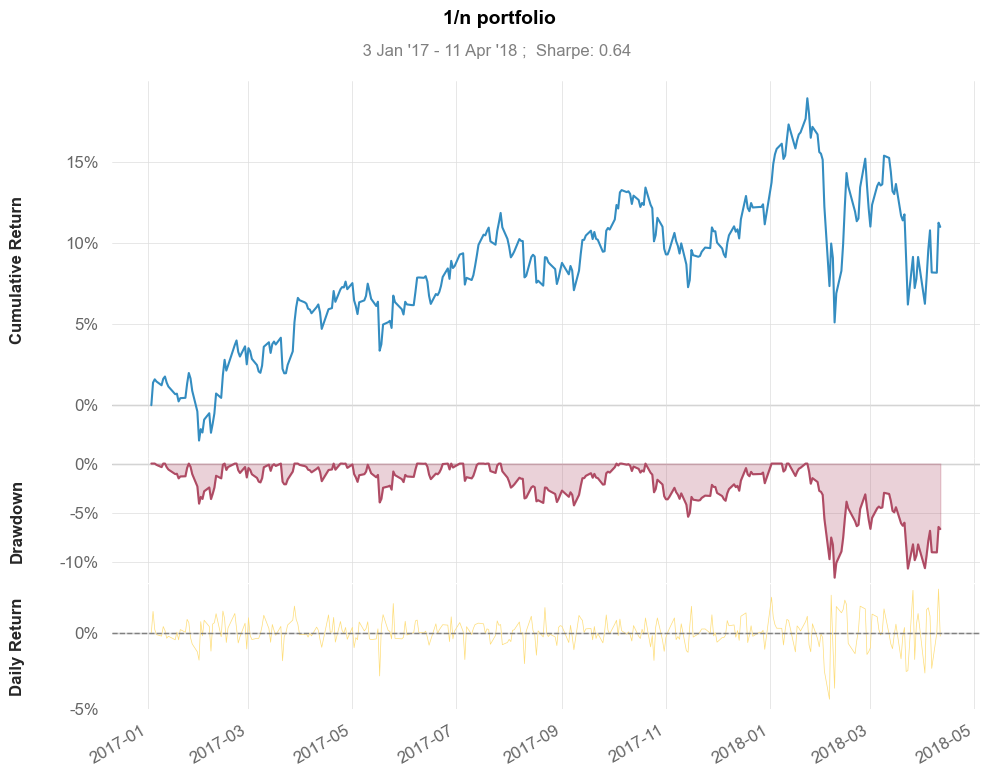

In [7]:
portfolio.snapshot(title="1/n portfolio", fontname=None, show=True)

In [19]:
# quantstats is extending pandas and adds methods such as sharpe() directly to pd.Series
print(portfolio.nav.sharpe())

0.6379901607052793


In [9]:
portfolio.metrics()

                    Strategy
------------------  ----------
Start Period        2017-01-04
End Period          2018-04-11
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   10.98%
CAGR﹪              5.85%

Sharpe              0.64
Prob. Sharpe Ratio  76.07%
Sortino             0.88
Sortino/√2          0.62
Omega               1.12

Max Drawdown        -11.61%
Longest DD Days     78

Gain/Pain Ratio     0.12
Gain/Pain (1M)      1.03

Payoff Ratio        1.02
Profit Factor       1.12
Common Sense Ratio  1.17
CPC Index           0.6
Tail Ratio          1.04
Outlier Win Ratio   3.47
Outlier Loss Ratio  4.07

MTD                 1.7%
3M                  -3.81%
6M                  -1.94%
YTD                 -0.14%
1Y                  4.66%
3Y (ann.)           5.85%
5Y (ann.)           5.85%
10Y (ann.)          5.85%
All-time (ann.)     5.85%

Avg. Drawdown       -1.95%
Avg. Drawdown Days  16
Recovery Factor     1.01
Ulcer Index         0.03
Serenity Index      0.55


In [10]:
portfolio.html(output="test.html")

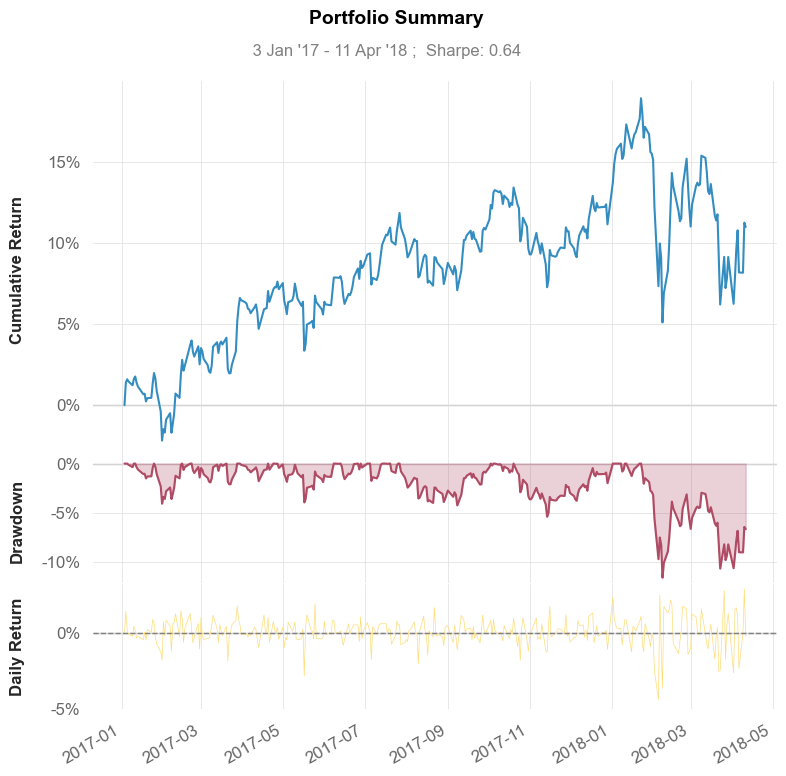

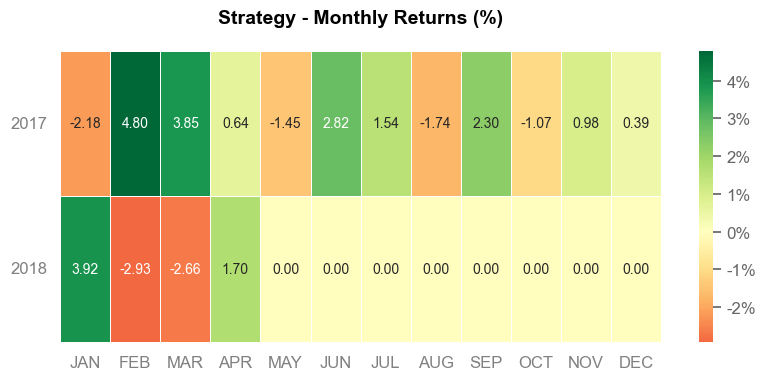

In [11]:
portfolio.plots()